In [576]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.neighbors import KNeighborsClassifier

In [577]:
df = pd.read_csv('updated_cleaned_data.csv')

In [578]:
df_houses = df[df['Type of Property'] == 'house']
df_apartments = df[df['Type of Property'] == 'apartment']
df_num_subset = df[['Price (€)', 'Price per m²', 'Construction year', 'Bedrooms',
       'Living area (m²)', 'Furnished', 'How many fireplaces?',
       'Terrace', 'Terrace surface (m²)', 'Garden', 'Garden surface (m²)',
       'Surface of the plot (m²)', 'Number of frontages', 'Swimming pool',
       'Elevator', 'Basement', 
       'Primary energy consumption (kWh/m²)', 'CO₂ emission (kg CO₂/m²)',
       'Kitchen type scale',
       'Building condition scale']]
df_houses_num_subset = df_houses[['Price (€)', 'Price per m²', 'Construction year', 'Bedrooms',
       'Living area (m²)', 'Furnished', 'How many fireplaces?',
       'Terrace', 'Terrace surface (m²)', 'Garden', 'Garden surface (m²)',
       'Surface of the plot (m²)', 'Number of frontages', 'Swimming pool',
       'Elevator', 'Basement', 
       'Primary energy consumption (kWh/m²)', 'CO₂ emission (kg CO₂/m²)',
       'Kitchen type scale',
       'Building condition scale']]
df_apartments_num_subset = df_apartments[['Price (€)', 'Price per m²', 'Construction year', 'Bedrooms',
       'Living area (m²)', 'Furnished', 'How many fireplaces?',
       'Terrace', 'Terrace surface (m²)', 'Garden', 'Garden surface (m²)',
       'Number of frontages', 'Swimming pool',
       'Elevator', 'Basement', 
       'Primary energy consumption (kWh/m²)', 'CO₂ emission (kg CO₂/m²)',
       'Kitchen type scale',
       'Building condition scale']]

In [579]:
# df.loc[df['Bedrooms'] == 30.0,['Property ID', 'Region', 'City', 'Price (€)', 'Living area (m²)']]

In [580]:
df.isnull().sum()

Property ID                                0
Zip code                                   0
City                                       0
Type of Property                           0
Subtype of Property                        0
Price (€)                                  0
Construction year                       5277
Bedrooms                                   0
Living area (m²)                           0
Kitchen type                            4631
Furnished                                  0
How many fireplaces?                       0
Terrace                                    0
Terrace surface (m²)                    3871
Garden                                     0
Garden surface (m²)                     2143
Surface of the plot (m²)                5868
Number of frontages                     3320
Swimming pool                              0
Building condition                      3609
Elevator                                   0
Basement                                   0
Primary en

Text(0.5, 1.0, 'Correlation Between Variables')

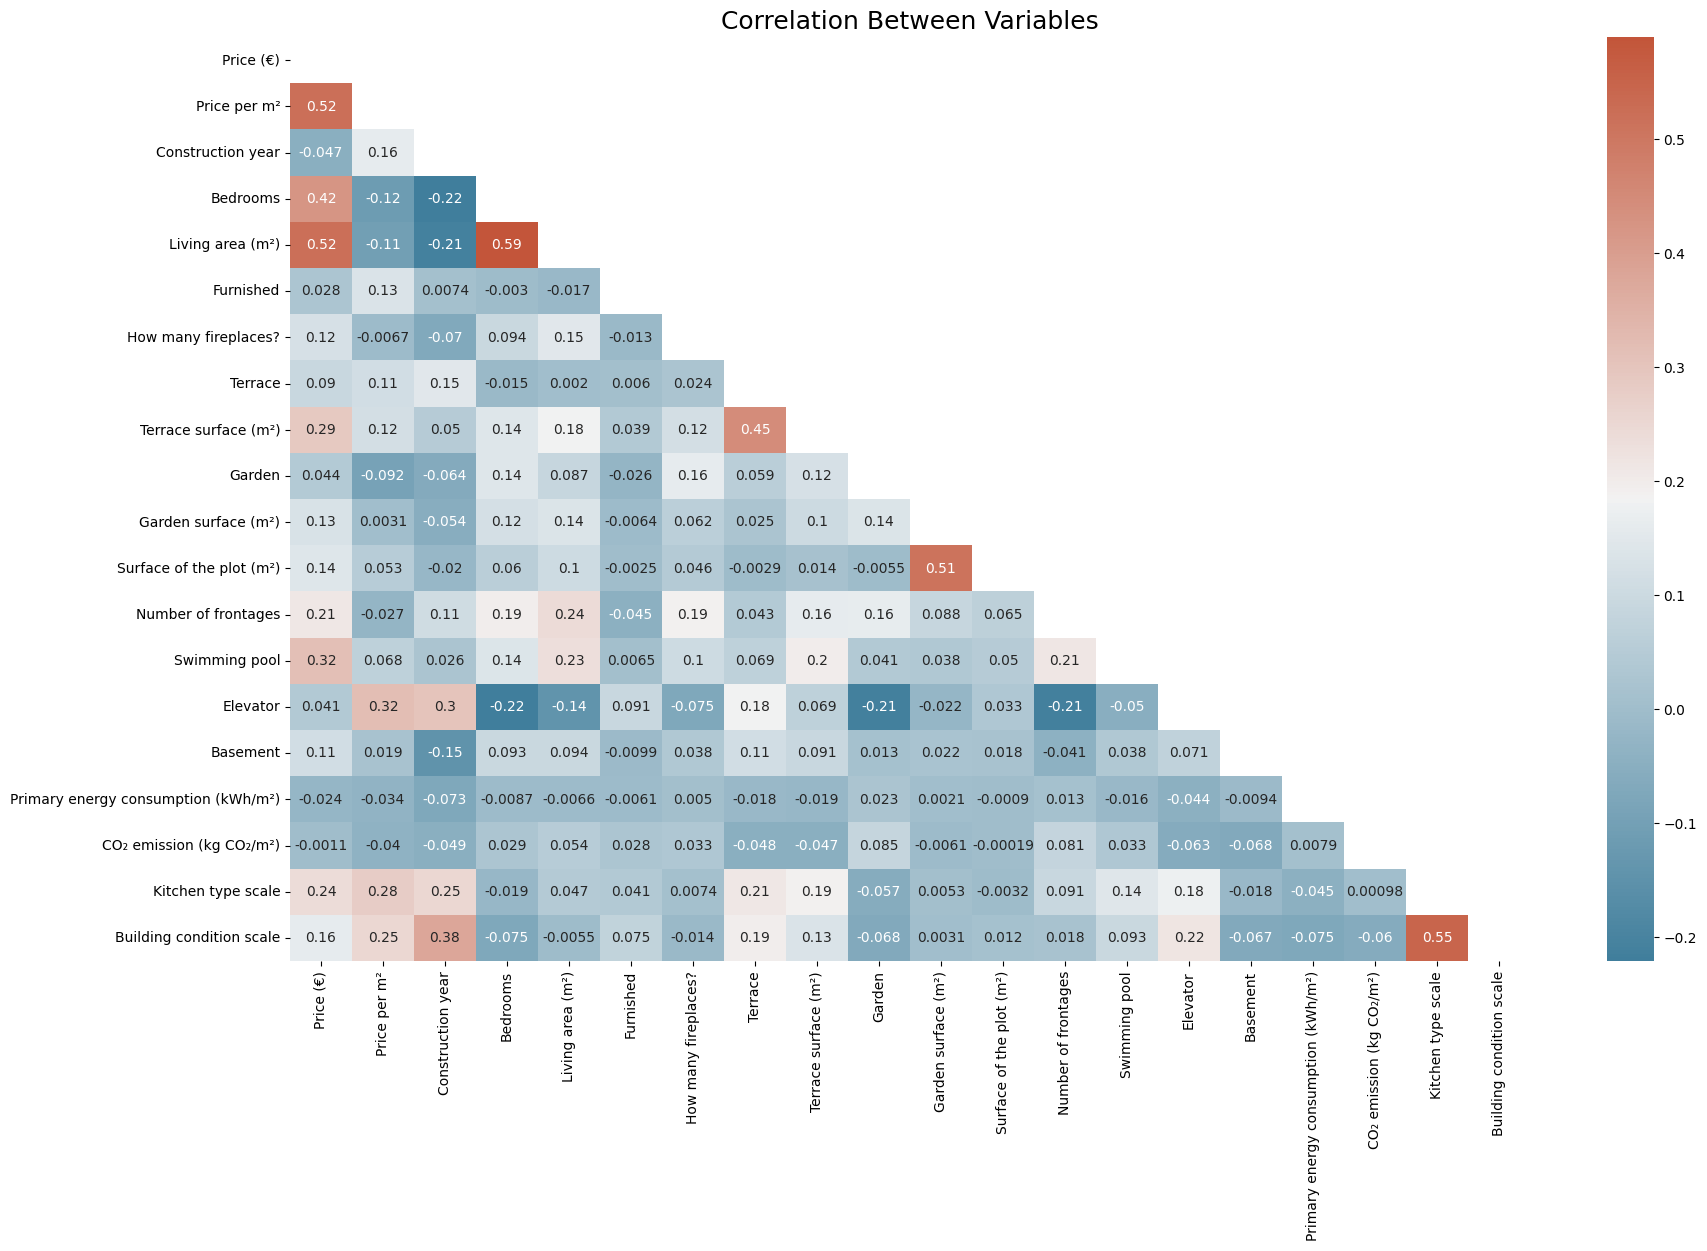

In [581]:
corr = df_num_subset.corr()
f, ax = plt.subplots(figsize=(20, 12))
# sns.set(font_scale=1)
# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)
plt.title("Correlation Between Variables", fontsize=18)

In [582]:
X = df[['Living area (m²)', 'Swimming pool', 'Bedrooms',
'Terrace', 'Terrace surface (m²)', 'Garden', 'Garden surface (m²)', 
'Furnished', 'How many fireplaces?']].values

y = df['Price (€)'].values

In [583]:
print(X.shape, y.shape)

(15146, 9) (15146,)


In [584]:
# X_liv_area = df['Living area (m²)'].values
# X_liv_area = X_liv_area.reshape(-1, 1)

In [585]:
# plt.scatter(X_liv_area, y)
# plt.xlabel('Living area (sqm)')
# plt.ylabel('Price (€)')

In [586]:
# reg = LinearRegression()
# reg.fit(X_liv_area, y)
# predictions = reg.predict(X_liv_area)

In [587]:
# plt.scatter(X_liv_area, y)
# plt.plot(X_liv_area, predictions)
# plt.xlabel('Living area (sqm)')
# plt.ylabel('Price (€)')
# plt.show()

In [588]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [589]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# R squared, the variance in target values explained by the features.
reg.score(X_test, y_test)

0.38501972921820127

In [ ]:
# MSE is to assess a regression model's performance, the mean of the residual sum of square.
# Squared equal to False, returns the square root of the MSE.
# The model has an average error of 470038 dollars for price.
mean_squared_error(y_test, y_pred, squared=False)

466961.6205950079

In [ ]:
# Creating several folds which uses each fold as the test set. 
# It enable us to make cross validations. As a result we get five values of R-squared 
# from which we can compute statistics of interest, such as the mean, median, and 95% confidence intervals.
kf = KFold(n_splits=6, shuffle=True, random_state=42)

In [ ]:
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=kf)
print(cv_results)
print(np.mean(cv_results), np.std(cv_results))
print(np.quantile(cv_results, [0.025, 0.975]))

[0.42470036 0.32291899 0.1568531  0.4287057  0.32820295 0.31973853]
0.33018660513660253 0.09023052258389018
[0.17721378 0.42820504]


In [ ]:
# Regularization in regression is to alter the loss function so that it penalizes large coefficients, 
# in order to avoid overfitting. With ridge, we use the Ordinary Least Squares loss function plus 
# the squared value of each coefficient, multiplied by a constant, alpha. 

scores=[]
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))
print(scores)

[0.3850185636059582, 0.38500793383888887, 0.38488848827998723, 0.38284742085466983, 0.36299293274694244]


In [ ]:
# Lasso is another type of regularized regression, where our loss function is the OLS loss function 
# plus the absolute value of each coefficient multiplied by some constant, alpha. 
# It can be used to assess feature importance. This is because lasso tends to shrink the coefficients 
# of less important features to zero. The features whose coefficients are not shrunk to zero are selected 
# by the lasso algorithm. 

scores_lasso=[]
for alpha in [0.01, 1.0, 10.0, 20.0, 50.0]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_pred = lasso.predict(X_test)
    scores_lasso.append(lasso.score(X_test, y_test))
print(scores_lasso)

[0.3850197238535835, 0.3850191925393701, 0.3850143401142435, 0.3850089011928266, 0.3849922892589789]


In [590]:
names = df[['Living area (m²)', 'Swimming pool', 'Bedrooms',
'Terrace', 'Terrace surface (m²)', 'Garden', 'Garden surface (m²)', 
'Furnished', 'How many fireplaces?']].columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X,y).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=90)
plt.show()

ValueError: Input X contains NaN.
Lasso does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [556]:
# knn = KNeighborsClassifier(n_neighbors=7)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)
# knn.fit(X_train, y_train)
# y_pred = knn.predict(X_test)
# print(classification_report(y_test, y_pred))


In [568]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {'alpha': np.arange(0.0001, 1, 10), 'solver':['sag', 'lsqr']}
ridge = Ridge()
ridge_cv = RandomizedSearchCV(ridge, param_grid, cv=kf, n_iter=2)
ridge_cv.fit(X_train, y_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)

/Users/saidkardic/Desktop/immoweb_project/immo_eliza_regression/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/saidkardic/Desktop/immoweb_project/immo_eliza_regression/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/saidkardic/Desktop/immoweb_project/immo_eliza_regression/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/saidkardic/Desktop/immoweb_project/immo_eliza_regression/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


{'solver': 'lsqr', 'alpha': 0.0001} 0.2202648897836391


/Users/saidkardic/Desktop/immoweb_project/immo_eliza_regression/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [569]:
test_score = ridge_cv.score(X_test, y_test)
print(test_score)

0.31736669626411673


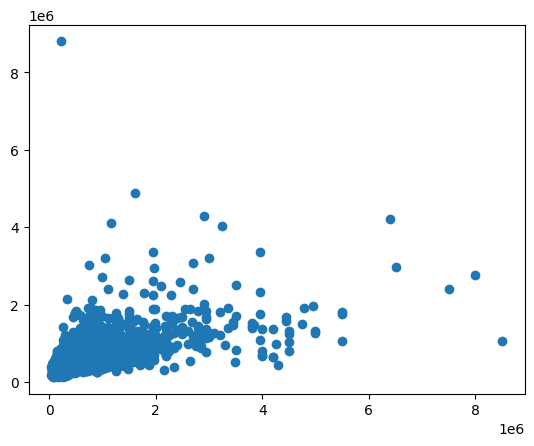

In [512]:
plt.scatter(y_test, y_pred)